# **Project 2: Space Rats**
James Burns & Giovane Kim

CS 520

In [3]:
import random
import copy
import math

## **Ship and other methods**

### **Generate the Board**

In [4]:
class ship():
    def __init__(self, d):
        self.dim = d
        self.ship_display = [['■' for i in range(d)] for j in range(d)] #■ for blocked i.e. not open
        self.open_ship = None
        self.start = ()
        self.bot_location = None
        self.rat_location = None
        self.pinged = set()

        #Choose a square in the interior to open at random
        y = random.randint(1, d-2)
        x = random.randint(1, d-2)
        self.ship_display[y][x] = 'O' #O for open
        #The board display can be imagined as Quadrant IV of a cartesian coordinate system, where the origin is in the top left and you read a coordinate as y spaces down and x spaces to the right
        #Iteratively do the following... (from assignment)
        while True:
            one_open_neighbor = list()
            for row in range(1, d-1):
                for col in range(1, d-1):
                    if self.ship_display[row][col] == '■':
                        open_neighbor_count = 0
                        if (row+1 <= d-1) and (self.ship_display[row+1][col] == 'O'):
                            open_neighbor_count += 1
                        if (row-1 >= 0) and (self.ship_display[row-1][col] == 'O'):
                            open_neighbor_count += 1
                        if (col+1 <= d-1) and (self.ship_display[row][col+1] == 'O'):
                            open_neighbor_count += 1
                        if (col-1 >= 0) and (self.ship_display[row][col-1] == 'O'):
                            open_neighbor_count += 1
                        if open_neighbor_count == 1:
                            one_open_neighbor.append((row,col))
            if len(one_open_neighbor) == 0:
                break
            random_neighbor = random.sample(one_open_neighbor, 1)[0]
            self.ship_display[random_neighbor[0]][random_neighbor[1]] = 'O'
        #ship.print_ship(self)

        #Open dead ends; pick random closed neighbor and open it
        dead_ends_list = list()
        for row in range(1, d-1):
            for col in range(1, d-1):
                if self.ship_display[row][col] == 'O':
                    open_neighbor_count = 0
                    if (row+1 <= d-1) and (self.ship_display[row+1][col] == 'O'):
                        open_neighbor_count += 1
                    if (row-1 >= 0) and (self.ship_display[row-1][col] == 'O'):
                        open_neighbor_count += 1
                    if (col+1 <= d-1) and (self.ship_display[row][col+1] == 'O'):
                        open_neighbor_count += 1
                    if (col-1 >= 0) and (self.ship_display[row][col-1] == 'O'):
                        open_neighbor_count += 1
                    if open_neighbor_count == 1:
                        dead_ends_list.append((row,col))
        half = len(dead_ends_list)//2
        dead_ends = random.sample(dead_ends_list, half)
        #print(dead_ends_list)
        #print(dead_ends)
        for dead_end in dead_ends:
            dead_end_blocked_neighbor = list()
            if (dead_end[0]+1 <= d-1) and (self.ship_display[dead_end[0]+1][dead_end[1]] == '■'):
                dead_end_blocked_neighbor.append((dead_end[0]+1, dead_end[1]))
            if (dead_end[0]-1 >= 0) and (self.ship_display[dead_end[0]-1][dead_end[1]] == '■'):
                dead_end_blocked_neighbor.append((dead_end[0]-1, dead_end[1]))
            if (dead_end[1]+1 <= d-1) and (self.ship_display[dead_end[0]][dead_end[1]+1] == '■'):
                dead_end_blocked_neighbor.append((dead_end[0], dead_end[1]+1))
            if (dead_end[1]-1 >= 0) and (self.ship_display[dead_end[0]][dead_end[1]-1] == '■'):
                dead_end_blocked_neighbor.append((dead_end[0], dead_end[1]-1))
            #print(dead_end_blocked_neighbor)
            if dead_end_blocked_neighbor != []: #Make sure block neighbor was not previously removed
                random_blocked_neighbor = random.sample(dead_end_blocked_neighbor, 1)[0]
                self.ship_display[random_blocked_neighbor[0]][random_blocked_neighbor[1]] = 'O'

        #Close outer edge cells
        for i in range(d):
            self.ship_display[0][i] = '■'
            self.ship_display[d-1][i] = '■'
            self.ship_display[i][0] = '■'
            self.ship_display[i][d-1] = '■'

        self.open_ship = copy.deepcopy(self.ship_display) #Keep a copy of the original ship to see which cells are opened/blocked

    #Print a 2D array representing the ship in a way that makes it appear as a maze to a human.
    #This version specifically only shows the original open and blocked cells when the maze is generated.
    def print_open_ship(self):
        for row in self.open_ship:
            formatted_row = ["{:1}".format(x) for x in row]
            print(" ".join(formatted_row))

    def flatten(self, row, col):
	    return row*self.dim + col

In [5]:
#Print a 2D array representing the ship in a way that makes it appear as a maze to a human.
#To be used for the ship display at specific times
def print_ship(ship):
    for row in ship.ship_display:
        formatted_row = ["{:1}".format(x) for x in row]
        print(" ".join(formatted_row))

In [6]:
#An example of the ship and it being printed two ways, printing the originally generated ship as well as the current display
ship_1 = ship(30)
ship_1.print_open_ship()
print()
print_ship(ship_1)

■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■
■ O O ■ O ■ O O O ■ O O O O ■ ■ O ■ O O O O O O O ■ O ■ O ■
■ O ■ ■ O ■ O ■ O ■ O O O O O O O O O ■ ■ ■ O ■ O O O O O ■
■ O ■ O O ■ ■ O O O O O O O ■ ■ O ■ O ■ O O O ■ O ■ O ■ O ■
■ O O O ■ O O ■ ■ O ■ ■ O ■ O O O O O O ■ ■ O O O O ■ O ■ ■
■ O ■ ■ O O ■ O O O O O O O O O O ■ ■ O O ■ O ■ ■ O O O ■ ■
■ O O O O ■ O O ■ ■ O O ■ O ■ ■ O ■ O ■ O O O O O ■ O O O ■
■ O O O O O O ■ O O O O O O ■ O O O O O O ■ ■ ■ O O O O O ■
■ O ■ O ■ ■ O ■ O ■ O O O ■ O O ■ ■ O ■ O O O ■ O ■ O ■ O ■
■ O O O O O O O O O O ■ O ■ O O O ■ O ■ O ■ O O O O O O O ■
■ ■ O O ■ ■ O ■ O ■ ■ O O ■ O O O ■ O O ■ O O O O O O O O ■
■ O O O ■ O O O ■ O O O ■ O ■ ■ O O O ■ O ■ O O ■ O ■ O ■ ■
■ ■ O O O ■ ■ O O O ■ O O O O O O ■ O O O O ■ ■ O O O O O ■
■ O O O O O O ■ ■ O O ■ ■ O ■ O ■ ■ O O ■ ■ O ■ O ■ O O ■ ■
■ O ■ ■ O O O O O O ■ O O O ■ O O ■ O ■ O ■ O ■ O O O ■ ■ ■
■ O ■ O O O ■ O O ■ O O O ■ O ■ O ■ O ■ O O O O O ■ O O ■ ■
■ O O O O O O ■ O ■ O O O O O O O O O ■ 

### **Place Bot, Rat**



In [7]:
#Place elements on the ship
def place_element(ship, element):
    random_cell_state = None
    while random_cell_state != 'O':
        row = random.randint(0, ship.dim-1)
        col = random.randint(0, ship.dim-1)
        if ship.open_ship[row][col] == 'O':
            ship.ship_display[row][col] = element
            random_cell_state = 'O'
            if element == 'B':
                ship.start = (row,col)
                ship.bot_location = ship.start
            if element == 'R':
                ship.rat_location = (row,col)
    return ship

#### test

In [8]:
d = 10
ship_2 = ship(d)

place_element(ship_2,'B')
place_element(ship_2,'R')

print(ship_2.start)
print(ship_2.bot_location)
print(ship_2.rat_location)
print_ship(ship_2)
#bot1(ship_2)

(8, 8)
(8, 8)
(1, 8)
■ ■ ■ ■ ■ ■ ■ ■ ■ ■
■ O O O O ■ ■ ■ R ■
■ O O ■ O O O O O ■
■ O ■ O O O O O O ■
■ O ■ O O O ■ O O ■
■ O O O ■ O O O ■ ■
■ ■ O ■ O ■ ■ ■ O ■
■ O O O O O O O O ■
■ ■ O ■ O O O O B ■
■ ■ ■ ■ ■ ■ ■ ■ ■ ■


### **3 Actions**

In [9]:
def neighbors_blocked(ship, bot_location_map): #Count number of cells neighboring bot that are blocked
  num_neighbors_currently_blocked = 0
  y = ship.bot_location[0]
  x = ship.bot_location[1]
  for i in range(-1,2):
    for j in range(-1,2):
      if not (i == 0 and j == 0):
        if bot_location_map[y + i][x + j] == '■':
          num_neighbors_currently_blocked += 1
  return num_neighbors_currently_blocked

In [10]:
def ping(ship, alpha, rat_KB): #Return ping (1) or no ping (0), or location is shared between bot and rat (-1)
  if ship.bot_location == ship.rat_location:
    return -1 #Bot and rat in same location
  bot_y = ship.bot_location[0]
  bot_x = ship.bot_location[1]
  rat_y = ship.rat_location[0]
  rat_x = ship.rat_location[1]
  manhattan_dist = abs(bot_y-rat_y) + abs(bot_x-rat_x)
  prob_hearing_ping = math.e ** (-1 * alpha * (manhattan_dist - 1))
  if random.uniform(0,1) < prob_hearing_ping:
    return 1 #ping
  else:
    return 0 #no ping

In [11]:
def attempt_to_move(ship, most_common_direction): #Update ship display and bot location if bot can move
  y = ship.bot_location[0]
  x = ship.bot_location[1]
  if most_common_direction == 'U':
    if ship.ship_display[y-1][x] != '■':
      ship.ship_display[y-1][x] = 'B'
      ship.bot_location = (y-1,x)
      ship.ship_display[y][x] = 'O'
      return True #Bot moved
    else:
      return False #Can't walk into a wall
  if most_common_direction == 'D':
    if ship.ship_display[y+1][x] != '■':
      ship.ship_display[y+1][x] = 'B'
      ship.bot_location = (y+1,x)
      ship.ship_display[y][x] = 'O'
      return True #Bot moved
    else:
      return False #Can't walk into a wall
  if most_common_direction == 'L':
    if ship.ship_display[y][x-1] != '■':
      ship.ship_display[y][x-1] = 'B'
      ship.bot_location = (y,x-1)
      ship.ship_display[y][x] = 'O'
      return True #Bot moved
    else:
      return False #Can't walk into a wall
  if most_common_direction == 'R':
    if ship.ship_display[y][x+1] != '■':
      ship.ship_display[y][x+1] = 'B'
      ship.bot_location = (y,x+1)
      ship.ship_display[y][x] = 'O'
      return True #Bot moved
    else:
      return False #Can't walk into a wall

### **Helper Methods**

In [16]:
#Helper methods for bots

#Phase 1 - Whenever you see phase1 it is this. The bot moving around and determining its own location as specified in the assignment. None of the bots change this.
# The only exception to this is when the rat moves, in which case there is a new phase 1 that just moves the rat and updates probabilities accordingly. But the algorithm doesn't really change.
def phase_1(ship):
  movements_taken = 0
  cell_sensing_actions = 0
  rat_detecting_actions = 0
  direction_max_out = 0
  bot_location_map = ship.open_ship
  #print_knowledge_base(bot_location_map)
  bot_location_known = False
  direction_to_move = None
  blocked_neighb_counts = num_blocked_neighbors(ship)

  while not bot_location_known:
    num_neighb_blckd = neighbors_blocked(ship, bot_location_map) #senses num of blocked neighbors
    cell_sensing_actions += 1

    for row in range(0,d): #rule out all locations in knowledge base that do not agree with num_neighb_blckd
      for col in range(0,d):
        if (blocked_neighb_counts[row][col] != num_neighb_blckd) and (bot_location_map[row][col] == 'O'):
          bot_location_map[row][col] = 'F' #F for the bot cannot possibly be there
    #print_knowledge_base(bot_location_map)
    #print()

    direction_to_move = identify_direction(bot_location_map) #get the direction to move the bot in

    #Edge case fix - sometimes the bot oscillates and cannot determine where it is, or cannot distinguish where it is due to similar surroundings
    # To fix this, the bot occassionally walks in one direction for multiple steps to "zero it out". The bot also takes a random step every once in a while.
    if random.uniform(0,1) < 0.2 and direction_max_out < 1: #Sometimes choose a random direction to avoid getting caught in a loop
      #print('random')
      prob = random.uniform(0,1)
      if prob < 0.25:
        hold_this_direction = 'U'
      elif prob < 0.5:
        hold_this_direction = 'D'
      elif prob < 0.75:
        hold_this_direction = 'L'
      else:
        hold_this_direction = 'R'
      direction_max_out = 5
    if direction_max_out > 0:
      direction_max_out -= 1
      direction_to_move = hold_this_direction

    if random.uniform(0,1) < 0.1:
      prob = random.uniform(0,1)
      if prob < 0.25:
        direction_to_move = 'U'
      elif prob < 0.5:
        direction_to_move = 'D'
      elif prob < 0.75:
        direction_to_move = 'L'
      else:
        direction_to_move = 'R'

    #print(direction_to_move)

    moved = attempt_to_move(ship, direction_to_move) #move the bot on the ship display if possible


    if moved: #If bot moved, rule out all locations where bot could not move in that direction
      movements_taken += 1
      for row in range(0,d):
        for col in range(0,d):
          if direction_to_move == 'U':
            if (row-1>=0) and (ship.open_ship[row-1][col] == '■') and (bot_location_map[row][col] != '■'):
              bot_location_map[row][col] = 'F'
          if direction_to_move == 'D':
            if (row+1<=d-1) and (ship.open_ship[row+1][col] == '■') and (bot_location_map[row][col] != '■'):
              bot_location_map[row][col] = 'F'
          if direction_to_move == 'L':
            if (col-1>=0) and (ship.open_ship[row][col-1] == '■') and (bot_location_map[row][col] != '■'):
              bot_location_map[row][col] = 'F'
          if direction_to_move == 'R':
            if (col+1<=d-1) and (ship.open_ship[row][col+1] == '■') and (bot_location_map[row][col] != '■'):
              bot_location_map[row][col] = 'F'

      bot_location_map_copy = [[None for a in range(d)] for b in range(d)] #Update cells where bot could be by 1 cell in appropriate direction ('O' cells move 1 in appropriate direction)
      for row in range(0,d):
        for col in range(0,d):
          if bot_location_map[row][col] == '■':
            bot_location_map_copy[row][col] = '■'
          elif (direction_to_move == 'U') and (row+1<=d-1) and (bot_location_map[row+1][col] == 'O'):
            bot_location_map_copy[row][col] = 'O'
          elif (direction_to_move == 'D') and (row-1>=0) and (bot_location_map[row-1][col] == 'O'):
            bot_location_map_copy[row][col] = 'O'
          elif (direction_to_move == 'L') and (col+1<=d-1) and (bot_location_map[row][col+1] == 'O'):
            bot_location_map_copy[row][col] = 'O'
          elif (direction_to_move == 'R') and (col-1>=0) and (bot_location_map[row][col-1] == 'O'):
            bot_location_map_copy[row][col] = 'O'
          else:
            bot_location_map_copy[row][col] = 'F'
      bot_location_map = bot_location_map_copy

      #print('moved')
      #print_knowledge_base(bot_location_map)
      #print_ship(ship_2)

    else: #If bot did not move, rule out all locations where bot could move in that direction
      for row in range(0,d):
        for col in range(0,d):
          if bot_location_map[row][col] == 'O':
            if direction_to_move == 'U':
              if (row-1>=0) and (ship.open_ship[row-1][col] != '■'):
                bot_location_map[row][col] = 'F'
            if direction_to_move == 'D':
              if (row+1<=d-1) and (ship.open_ship[row+1][col] != '■'):
                bot_location_map[row][col] = 'F'
            if direction_to_move == 'L':
              if (col-1>=0) and (ship.open_ship[row][col-1] != '■'):
                bot_location_map[row][col] = 'F'
            if direction_to_move == 'R':
              if (col+1<=d-1) and (ship.open_ship[row][col+1] != '■'):
                bot_location_map[row][col] = 'F'
      #print('did not move')
      #print_knowledge_base(bot_location_map)
      #print_ship(ship_2)
    #

    if count_bot_locations(bot_location_map) == 1: #Successfully found bot's location
      bot_location_known = True

  bot_location = ship.bot_location
  return None

def print_knowledge_base(knowledge_base): #to be used for the bot KB, the rat KB, or the matrix of blocked neighbors
  for row in knowledge_base:
    formatted_row = ["{:1}".format(x) for x in row]
    print(" ".join(formatted_row))

def num_blocked_neighbors(ship): #needs to be computed once only, gets the number of blocked neighbors for each cell in the ship
  blocked_neighbor_matrix = [[0 for a in range(d)] for b in range(d)]
  for row in range(0,d):
    for col in range(0,d):
      num_neighbors_currently_blocked = 0
      for i in range(-1,2):
        for j in range(-1,2):
          if (not (i == 0 and j == 0)) and (i+row>=0) and (j+col>=0) and (i+row<=d-1) and (j+col<=d-1):
            if ship.open_ship[row + i][col + j] == '■':
              num_neighbors_currently_blocked += 1
      blocked_neighbor_matrix[row][col] =  num_neighbors_currently_blocked
  return blocked_neighbor_matrix

def identify_direction(bot_location_map): #identify most commonly open direction of remaining squares that the bot could be on
  up_count = 0
  down_count = 0
  left_count = 0
  right_count = 0
  for row in range(0,d):
    for col in range(0,d):
      if bot_location_map[row][col] != '■':
        if (row-1>=0) and (bot_location_map[row-1][col] != '■'):
          up_count += 1
        if (row+1<=d-1) and (bot_location_map[row+1][col] != '■'):
          down_count += 1
        if (col-1>=0) and (bot_location_map[row][col-1] != '■'):
          left_count += 1
        if (col+1<=d-1) and (bot_location_map[row][col+1] != '■'):
          right_count += 1

  max_count = max(up_count, down_count, left_count, right_count)
  direction_to_choose = []
  if up_count == max_count:
    direction_to_choose.append('U')
  if down_count == max_count:
    direction_to_choose.append('D')
  if left_count == max_count:
    direction_to_choose.append('L')
  if right_count == max_count:
    direction_to_choose.append('R')
  return random.choice(direction_to_choose)

def count_bot_locations(bot_location_map): #Counts the number of open (not blocked) cells on the map
  locations = 0
  for row in range(0,d):
    for col in range(0,d):
      if bot_location_map[row][col] == 'O':
        locations += 1
  return locations

def set_initial_probs(rat_location_probs):
  open_counter = 0
  for row in range(0,d): #Set inital cell probs to 0 if blocked cell
    for col in range(0,d):
      if rat_location_probs[row][col] == '■':
        rat_location_probs[row][col] = 0
      else:
        open_counter += 1
  for row in range(0,d): #Set initial cell probs to 1 divided by total open cells if open cell
    for col in range(0,d):
      if rat_location_probs[row][col] != 0:
        rat_location_probs[row][col] = 1 / open_counter

#### BFS

In [13]:
#Helper method for ship traversal - utilize bfs to find shortest path
def get_shortest_path(ship, rat_predicted_location):
  neighbors = []
  visited = set()
  prev = dict()
  neighbors.append(ship.bot_location)
  #print('neighbors', neighbors)
  #print('bot location', ship.bot_location)
  visited.add(ship.bot_location)
  prev[ship.bot_location] = None
  board = ship.ship_display
  found = False
  while(True):
    #print_ship(ship)
    if len(neighbors) < 1:
      break
    row, col = neighbors.pop(0)
    #print('3', (row,col))
    #print('4', rat_predicted_location)
    if((row,col) == rat_predicted_location): #not rat's actual location, rather where rat is most likely to be
      path = retrace(prev, (row, col))
      return path
      break

    if(row - 1 >= 0 and ship.ship_display[row-1][col] != '■' and (row-1, col) not in visited):
      neighbors.append((row-1, col))
      visited.add((row-1, col))
      prev[(row-1, col)] = (row, col)

    if(row + 1 < ship.dim and ship.ship_display[row+1][col] != '■' and (row+1, col) not in visited):
      neighbors.append((row+1, col))
      visited.add((row+1, col))
      prev[(row+1, col)] = (row, col)

    if(col-1 >= 0 and ship.ship_display[row][col-1] != '■' and (row, col-1) not in visited):
      neighbors.append((row, col-1))
      visited.add((row, col-1))
      prev[(row, col-1)] = (row, col)

    if(col + 1 < ship.dim and ship.ship_display[row][col+1] != '■' and (row, col+1) not in visited):
      neighbors.append((row, col+1))
      visited.add((row, col+1))
      prev[(row, col+1)] = (row, col)

def retrace(prev, start):
  route = []
  while(prev[start] != None):
    route.append(start)
    start = prev[start]
  route.reverse()
  #print(route)
  return route

## **Stationary Rat**

### Baseline Bot

#### Bot 1

In [ ]:
def baseline_bot(ship, alpha):
  movements_taken = 0
  cell_sensing_actions = 0
  rat_detecting_actions = 0
  direction_max_out = 0

  # PHASE 1
  phase_1(ship)

  # PHASE 2 #as specified in assignment
  rat_location_probs = ship.open_ship
  open_counter = 0
  for row in range(0,d): #Set inital cell probs to 0 if blocked cell
    for col in range(0,d):
      if rat_location_probs[row][col] == '■':
        rat_location_probs[row][col] = 0
      else:
        open_counter += 1
  for row in range(0,d): #Set initial cell probs to 1 divided by total open cells if open cell
    for col in range(0,d):
      if rat_location_probs[row][col] != 0:
        rat_location_probs[row][col] = 1 / open_counter

  #print_knowledge_base(rat_location_probs)
  rat_location_known = False
  while not rat_location_known:
    pinged = ping(ship, alpha, rat_location_probs) #use the sensor
    rat_detecting_actions += 1
    if pinged == -1: #Bot and rat are in same square
      rat_location_known = True
    if pinged == 1: #Bot heard ping
      for row in range(0,d):
        for col in range(0,d): # new prob times old prob relative to dist between bot and rat
          rat_location_probs[row][col] = (math.e ** (-1 * alpha * ((abs(row-ship.bot_location[0]) + abs(col-ship.bot_location[1])) - 1))) * (rat_location_probs[row][col]) / (math.e ** (-1 * alpha * ((abs(ship.bot_location[0]-ship.rat_location[0]) + abs(ship.bot_location[1]-ship.rat_location[1])) - 1)))
          if rat_location_probs[row][col] < 0: # 1Q Rat is not where bot just was, so make the odds of the rat being there small but nonzero
            rat_location_probs[row][col] = 0.00000000001
    if pinged == 0: #Bot does not hear ping
      for row in range(0,d):
        for col in range(0,d):
          rat_location_probs[row][col] = (1 - (math.e ** (-1 * alpha * ((abs(row-ship.bot_location[0]) + abs(col-ship.bot_location[1])) - 1)))) * (rat_location_probs[row][col]) / (1 - (math.e ** (-1 * alpha * ((abs(ship.bot_location[0]-ship.rat_location[0]) + abs(ship.bot_location[1]-ship.rat_location[1])) - 1))))
          if rat_location_probs[row][col] < 0: # 1Q Rat is not where bot just was, so make the odds of the rat being there small but nonzero
            rat_location_probs[row][col] = 0.00000000001
    #print_knowledge_base(rat_location_probs)

    rat_most_likely = (None,None)
    max_prob = 0
    for row in range(0,d): #get cell rat is most likely to be in
      for col in range(0,d):
        if rat_location_probs[row][col] > max_prob and (row,col) != ship.bot_location:
          max_prob = rat_location_probs[row][col]
          rat_most_likely = (row,col)
    #print(rat_most_likely)

    path = get_shortest_path(ship, rat_most_likely) #find shortest path and move the bot one square along it
    #print("Path", path)
    next_cell = path[0]
    bot_prev_location = ship.bot_location
    ship.ship_display[next_cell[0]][next_cell[1]] = 'B'
    ship.ship_display[bot_prev_location[0]][bot_prev_location[1]] = 'O'
    ship.bot_location = next_cell
    movements_taken += 1

  return movements_taken + cell_sensing_actions + rat_detecting_actions, movements_taken, cell_sensing_actions, rat_detecting_actions

#### Testing Bot 1

In [ ]:
alpha = 0.1
total_moves=0
iterations = 100
for i in range(iterations):
  d = 30
  this_ship = ship(d)
  place_element(this_ship,'B')
  place_element(this_ship,'R')

  run_moves, movements_taken, cell_sensing_actions, rat_detecting_actions = baseline_bot(this_ship, alpha)
  total_moves += run_moves
print(total_moves/iterations)

205.64


### Bot 2

#### Bot 2 (Improved bot 1)

In [ ]:
#the first phase of this bot is exactly the same as the baseline bot
#the second phase is different. We keep track of the highest probability of rat to distance ratio cell.
def bot2(ship, alpha):

  movements_taken = 0
  cell_sensing_actions = 0
  rat_detecting_actions = 0
  direction_max_out = 0
  # PHASE 1
  phase_1(ship)

  # PHASE 2:
  #Instead of just moving once at time, the bot will move to the location with the highest probability/distance ratio and then ping again
  #the exception being if the cell it is currently in has a probability higher than a given number
  rat_location_probs = ship.open_ship
  open_counter = 0
  for row in range(0,d): #Set inital cell probs to 0 if blocked cell
    for col in range(0,d):
      if rat_location_probs[row][col] == '■':
        rat_location_probs[row][col] = 0
      else:
        open_counter += 1
  for row in range(0,d): #Set initial cell probs to 1 divided by total open cells if open cell
    for col in range(0,d):
      if rat_location_probs[row][col] != 0:
        rat_location_probs[row][col] = 1 / open_counter

  #print_knowledge_base(rat_location_probs)
  rat_location_known = False

  while not rat_location_known:
    pinged = ping(ship, alpha, rat_location_probs) #use the sensor
    rat_detecting_actions += 1

    if pinged == -1: #Bot and rat are in same square
      rat_location_known = True

    if pinged == 1: #Bot heard ping (rat not in the current cell)
      ship.pinged.add(ship.bot_location)
      for row in range(0,d):
        for col in range(0,d): # new prob times old prob relative to dist between bot and rat
          rat_location_probs[row][col] = (math.e ** (-1 * alpha * ((abs(row-ship.bot_location[0]) + abs(col-ship.bot_location[1])) - 1))) * (rat_location_probs[row][col]) / (math.e ** (-1 * alpha * ((abs(ship.bot_location[0]-ship.rat_location[0]) + abs(ship.bot_location[1]-ship.rat_location[1])) - 1)))
          if rat_location_probs[row][col] < 0: # 1Q Rat is not where bot just was, so make the odds of the rat being there small but nonzero
            rat_location_probs[row][col] = 0.0000000000000001

    if pinged == 0: #Bot does not hear ping (rat not in the current cell)
      ship.pinged.add(ship.bot_location)
      for row in range(0,d):
        for col in range(0,d):
          rat_location_probs[row][col] = (1 - (math.e ** (-1 * alpha * ((abs(row-ship.bot_location[0]) + abs(col-ship.bot_location[1])) - 1)))) * (rat_location_probs[row][col]) / (1 - (math.e ** (-1 * alpha * ((abs(ship.bot_location[0]-ship.rat_location[0]) + abs(ship.bot_location[1]-ship.rat_location[1])) - 1))))
          if rat_location_probs[row][col] < 0: # 1Q Rat is not where bot just was, so make the odds of the rat being there small but nonzero
            rat_location_probs[row][col] = 0.0000000000000001

    #print_knowledge_base(rat_location_probs)

    highest_ratio_location = (None,None) #stores the coordinates of the highest probability/distance ratio
    max_ratio = 0

    for row in range(0,d): #get cell with highest prob/dist ratio
      for col in range(0,d):
        if rat_location_probs[row][col] != 0 and ship.bot_location != (row,col):
          length = len(get_shortest_path(ship,(row,col)))
          if (row,col) in ship.pinged:
            rat_location_probs[row][col] = 0.0000000000000001
          else:
            if length != 1 and (row,col):
              if rat_location_probs[row][col]/math.log(length+1) > max_ratio and (row,col) != ship.bot_location:
                max_ratio = rat_location_probs[row][col]
                highest_ratio_location = (row,col)
            elif length ==1 and (row,col):
              if rat_location_probs[row][col]/1 > max_ratio and (row,col) != ship.bot_location: #second condition is redondant, but I kept it just because
                max_ratio = rat_location_probs[row][col]
                highest_ratio_location = (row,col)
    #print(highest_ratio_location)

    path = get_shortest_path(ship, highest_ratio_location) #find shortest path
    #print("Path", path)

    while ship.bot_location != highest_ratio_location:#move the bot all the way to the cell with the highest ratio
      next_cell = path[0]
      bot_prev_location = ship.bot_location
      ship.ship_display[next_cell[0]][next_cell[1]] = 'B'
      ship.ship_display[bot_prev_location[0]][bot_prev_location[1]] = 'O'
      ship.bot_location = next_cell
      movements_taken += 1
      #print(ship.bot_location, highest_ratio_location)
      #check to see if the cell the bot is currently in has a probability higher than 1%. If so, ping again.
      if rat_location_probs[ship.bot_location[0]][ship.bot_location[1]] >=0.01:
        #ping and update probsS
        break
      path = path[1:]

  return movements_taken + cell_sensing_actions + rat_detecting_actions, movements_taken, cell_sensing_actions, rat_detecting_actions

#### Testing Bot 2


In [ ]:
alpha = 0.1
total_moves=0
iterations = 100
for i in range(iterations):
  d = 30
  this_ship = ship(d)
  place_element(this_ship,'B')
  place_element(this_ship,'R')

  run_moves, movements_taken, cell_sensing_actions, rat_detecting_actions = bot2(this_ship, alpha)
  total_moves += run_moves
print(total_moves/iterations)

189.7


### **DATA FOR STATIONARY RAT**

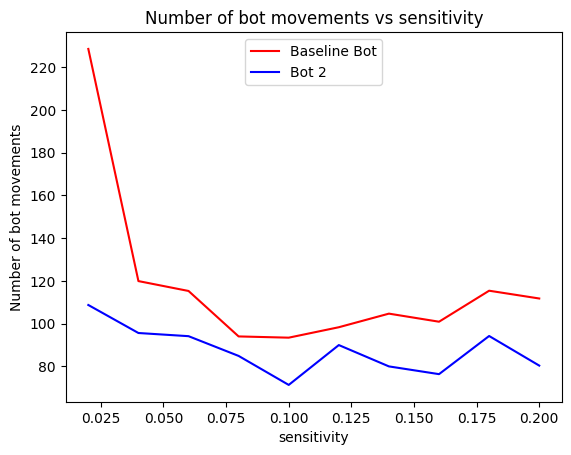

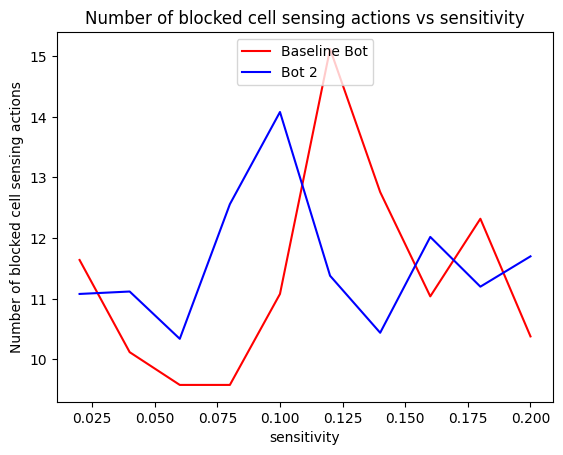

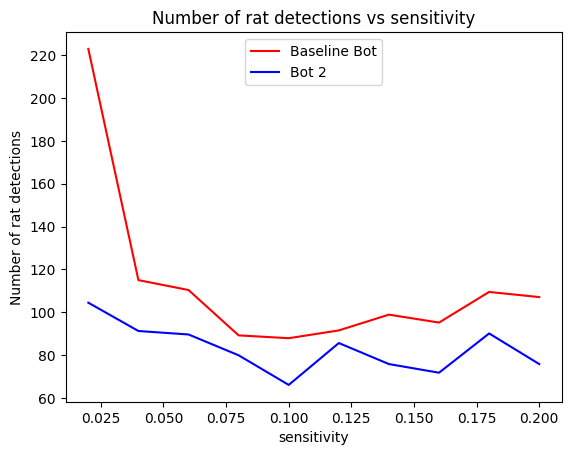

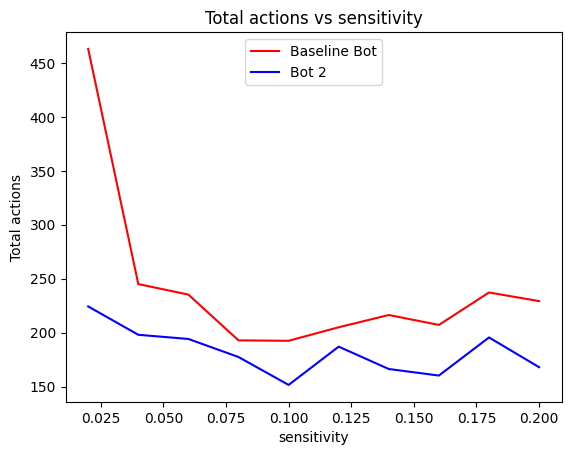

In [1]:
import matplotlib.pyplot as plt

alpha_arr = [0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2]
movements_2 = [108.76, 95.66, 94.18, 84.94, 71.38, 90.02, 80.04, 76.42, 94.26, 80.42]
senses_2 = [11.08, 11.12, 10.34, 12.56, 14.08, 11.38, 10.44, 12.02, 11.2, 11.7]
detections_2 = [ 104.42, 91.2, 89.58, 79.86, 66.02, 85.58, 75.76, 71.72, 90.06, 75.76]
totals_2 = [224.26, 197.98, 194.1, 177.36, 151.48, 186.98, 166.24, 160.16, 195.52, 167.92]
movements_1 = [228.52, 119.94, 115.32, 94.06, 93.48, 98.36, 104.72, 100.94, 115.44, 111.8]
senses_1 = [11.64, 10.12, 9.58, 9.58, 11.08, 15.12, 12.76, 11.04, 12.32, 10.38]
detections_1 = [222.94, 114.96, 110.34, 89.16, 87.84, 91.48, 98.84, 95.14, 109.44, 107.04]
totals_1 = [463.1, 245.02, 235.24, 192.8, 192.4, 204.96, 216.32, 207.12, 237.2, 229.22]

plt.figure()
plt.plot(alpha_arr, movements_1, color='r', label="Baseline Bot")
plt.plot(alpha_arr, movements_2, color='b', label="Bot 2")
plt.legend(loc="upper center")
plt.title('Number of bot movements vs sensitivity')
plt.ylabel('Number of bot movements')
plt.xlabel('sensitivity')
plt.show()

plt.figure()
plt.plot(alpha_arr, senses_1, color='r', label="Baseline Bot")
plt.plot(alpha_arr, senses_2, color='b', label="Bot 2")
plt.legend(loc="upper center")
plt.title('Number of blocked cell sensing actions vs sensitivity')
plt.ylabel('Number of blocked cell sensing actions')
plt.xlabel('sensitivity')
plt.show()

plt.figure()
plt.plot(alpha_arr, detections_1, color='r', label="Baseline Bot")
plt.plot(alpha_arr, detections_2, color='b', label="Bot 2")
plt.legend(loc="upper center")
plt.title('Number of rat detections vs sensitivity')
plt.ylabel('Number of rat detections')
plt.xlabel('sensitivity')
plt.show()

plt.figure()
plt.plot(alpha_arr, totals_1, color='r', label="Baseline Bot")
plt.plot(alpha_arr, totals_2, color='b', label="Bot 2")
plt.legend(loc="upper center")
plt.title('Total actions vs sensitivity')
plt.ylabel('Total actions')
plt.xlabel('sensitivity')
plt.show()

## **Moving rat**

### Helper Methods for moving rat

In [13]:
def move_rat(ship): #Update ship display and move rat randomly
  y = ship.rat_location[0]
  x = ship.rat_location[1]
  rat_moved = False
  direction_list = ['U','D','L','R']
  while not rat_moved:
    direction = random.choice(direction_list)
    if direction == 'U' and y-1>=0 and ship.ship_display[y-1][x] != '■':
      ship.ship_display[y-1][x] = 'R'
      ship.rat_location = (y-1,x)
      ship.ship_display[y][x] = 'O'
      rat_moved = True
    if direction == 'D' and y+1<=d-1 and ship.ship_display[y+1][x] != '■':
      ship.ship_display[y+1][x] = 'R'
      ship.rat_location = (y+1,x)
      ship.ship_display[y][x] = 'O'
      rat_moved = True
    if direction == 'L' and x-1>=0 and ship.ship_display[y][x-1] != '■':
      ship.ship_display[y][x-1] = 'R'
      ship.rat_location = (y,x-1)
      ship.ship_display[y][x] = 'O'
      rat_moved = True
    if direction == 'R' and x+1<=d-1 and ship.ship_display[y][x+1] != '■':
      ship.ship_display[y][x+1] = 'R'
      ship.rat_location = (y,x+1)
      ship.ship_display[y][x] = 'O'
      rat_moved = True
    direction_list.remove(direction)

In [14]:
#Gets the number of open neighbors for every cell
def cardinal_openings(ship):
  num_cardinal_open_neighbors_matrix = [[0 for i in range(d)] for j in range(d)]
  for row in range(d):
    for col in range(d):
      if row-1>=0 and ship.open_ship[row-1][col] != '■':
        num_cardinal_open_neighbors_matrix[row][col] += 1
      if row+1<=d-1 and ship.open_ship[row+1][col] != '■':
        num_cardinal_open_neighbors_matrix[row][col] += 1
      if col-1>=0 and ship.open_ship[row][col-1] != '■':
        num_cardinal_open_neighbors_matrix[row][col] += 1
      if col+1<=d-1 and ship.open_ship[row][col+1] != '■':
        num_cardinal_open_neighbors_matrix[row][col] += 1
  return num_cardinal_open_neighbors_matrix

#Update rat probabilities after rat moves (See Question 4 in writeup)
#For every cell, make sure it is open and not blocked and if it is, then look in the four cardinal directions and see if those squares and exist and are open
#If the neighbor exists and is open, then get the current probability of the rat being in that cell from the current knowledge base
#Then use the cardinal_openings method (above) to find the number of open neighbors, call it N.
#This means there is a 1 in N chance that, assuming the rat is in the cell, the rat moves out of the cell and into one of its neighbors,
#so divide the current probability of the rat being in the neighboring cell by N, and then add that to the probability of the original cell
#Since this "piece" of the probability has left the neighboring cell and went to the cell being examined, you also have to subtract that "piece" from the cell it left
#I want to reiterate this is done for all 4 cardinal neighbors
def rat_cardinal_update(ship, rat_KB_copy, rat_location_probs, num_possible_movement_matrix):
  for row in range(d):
      for col in range(d):
        if ship.ship_display[row][col] != '■':
          #print(row,col, rat_KB_copy[row][col], ship.ship_display[row][col])
          if row-1>=0 and ship.ship_display[row-1][col]!='■' and num_possible_movement_matrix[row-1][col]>0:
            rat_KB_copy[row][col] += rat_location_probs[row-1][col] / num_possible_movement_matrix[row-1][col] #Prob is now old prob at location plus the odds the rat is coming from any cardinal neighbor
            rat_KB_copy[row-1][col] -= rat_location_probs[row-1][col] / num_possible_movement_matrix[row-1][col] #Need to subtract out the portion of the probability that was "given" to another cell
          if row+1<=d-1 and ship.ship_display[row+1][col]!='■' and num_possible_movement_matrix[row+1][col]>0:
            rat_KB_copy[row][col] += rat_location_probs[row+1][col] / num_possible_movement_matrix[row+1][col]
            rat_KB_copy[row+1][col] -= rat_location_probs[row+1][col] / num_possible_movement_matrix[row+1][col]
          if col-1>=0 and ship.ship_display[row][col-1]!='■' and num_possible_movement_matrix[row][col-1]>0:
            rat_KB_copy[row][col] += rat_location_probs[row][col-1] / num_possible_movement_matrix[row][col-1]
            rat_KB_copy[row][col-1] -= rat_location_probs[row][col-1] / num_possible_movement_matrix[row][col-1]
          if col+1<=d-1 and ship.ship_display[row][col+1]!='■' and num_possible_movement_matrix[row][col+1]>0:
            rat_KB_copy[row][col] += rat_location_probs[row][col+1] / num_possible_movement_matrix[row][col+1]
            rat_KB_copy[row][col+1] -= rat_location_probs[row][col+1] / num_possible_movement_matrix[row][col+1]
          #print(row,col, rat_KB_copy[row][col])
  return rat_KB_copy

In [15]:
# Same as previous phase_1, except now the rat moves whenever the bot takes an action
def phase_1_rat(ship, movements_taken, cell_sensing_actions, rat_detecting_actions):
  # movements_taken = 0
  # cell_sensing_actions = 0
  # rat_detecting_actions = 0
  direction_max_out = 0
  bot_location_map = ship.open_ship
  #print_knowledge_base(bot_location_map)
  bot_location_known = False
  direction_to_move = None
  blocked_neighb_counts = num_blocked_neighbors(ship)

  while not bot_location_known:
    num_neighb_blckd = neighbors_blocked(ship, bot_location_map) #senses num of blocked neighbors
    cell_sensing_actions += 1

    for row in range(0,d): #rule out all locations in knowledge base that do not agree with num_neighb_blckd
      for col in range(0,d):
        if (blocked_neighb_counts[row][col] != num_neighb_blckd) and (bot_location_map[row][col] == 'O'):
          bot_location_map[row][col] = 'F' #F for the bot cannot possibly be there
    #print_knowledge_base(bot_location_map)
    #print()

    direction_to_move = identify_direction(bot_location_map) #get the direction to move the bot in

    #weird edge case fix
    if random.uniform(0,1) < 0.2 and direction_max_out < 1: #Sometimes choose a random direction to avoid getting caught in a loop
      #print('random')
      prob = random.uniform(0,1)
      if prob < 0.25:
        hold_this_direction = 'U'
      elif prob < 0.5:
        hold_this_direction = 'D'
      elif prob < 0.75:
        hold_this_direction = 'L'
      else:
        hold_this_direction = 'R'
      direction_max_out = 5
    if direction_max_out > 0:
      direction_max_out -= 1
      direction_to_move = hold_this_direction

    if random.uniform(0,1) < 0.1:
      prob = random.uniform(0,1)
      if prob < 0.25:
        direction_to_move = 'U'
      elif prob < 0.5:
        direction_to_move = 'D'
      elif prob < 0.75:
        direction_to_move = 'L'
      else:
        direction_to_move = 'R'

    #print(direction_to_move)

    moved = attempt_to_move(ship, direction_to_move) #move the bot on the ship display if possible


    if moved: #If bot moved, rule out all locations where bot could not move in that direction
      movements_taken += 1
      for row in range(0,d):
        for col in range(0,d):
          if direction_to_move == 'U':
            if (row-1>=0) and (ship.open_ship[row-1][col] == '■') and (bot_location_map[row][col] != '■'):
              bot_location_map[row][col] = 'F'
          if direction_to_move == 'D':
            if (row+1<=d-1) and (ship.open_ship[row+1][col] == '■') and (bot_location_map[row][col] != '■'):
              bot_location_map[row][col] = 'F'
          if direction_to_move == 'L':
            if (col-1>=0) and (ship.open_ship[row][col-1] == '■') and (bot_location_map[row][col] != '■'):
              bot_location_map[row][col] = 'F'
          if direction_to_move == 'R':
            if (col+1<=d-1) and (ship.open_ship[row][col+1] == '■') and (bot_location_map[row][col] != '■'):
              bot_location_map[row][col] = 'F'

      bot_location_map_copy = [[None for a in range(d)] for b in range(d)] #Update cells where bot could be by 1 cell in appropriate direction ('O' cells move 1 in appropriate direction)
      for row in range(0,d):
        for col in range(0,d):
          if bot_location_map[row][col] == '■':
            bot_location_map_copy[row][col] = '■'
          elif (direction_to_move == 'U') and (row+1<=d-1) and (bot_location_map[row+1][col] == 'O'):
            bot_location_map_copy[row][col] = 'O'
          elif (direction_to_move == 'D') and (row-1>=0) and (bot_location_map[row-1][col] == 'O'):
            bot_location_map_copy[row][col] = 'O'
          elif (direction_to_move == 'L') and (col+1<=d-1) and (bot_location_map[row][col+1] == 'O'):
            bot_location_map_copy[row][col] = 'O'
          elif (direction_to_move == 'R') and (col-1>=0) and (bot_location_map[row][col-1] == 'O'):
            bot_location_map_copy[row][col] = 'O'
          else:
            bot_location_map_copy[row][col] = 'F'
      bot_location_map = bot_location_map_copy

      #print('moved')
      #print_knowledge_base(bot_location_map)
      #print_ship(ship_2)

    else: #If bot did not move, rule out all locations where bot could move in that direction
      for row in range(0,d):
        for col in range(0,d):
          if bot_location_map[row][col] == 'O':
            if direction_to_move == 'U':
              if (row-1>=0) and (ship.open_ship[row-1][col] != '■'):
                bot_location_map[row][col] = 'F'
            if direction_to_move == 'D':
              if (row+1<=d-1) and (ship.open_ship[row+1][col] != '■'):
                bot_location_map[row][col] = 'F'
            if direction_to_move == 'L':
              if (col-1>=0) and (ship.open_ship[row][col-1] != '■'):
                bot_location_map[row][col] = 'F'
            if direction_to_move == 'R':
              if (col+1<=d-1) and (ship.open_ship[row][col+1] != '■'):
                bot_location_map[row][col] = 'F'
      #print('did not move')
      #print_knowledge_base(bot_location_map)
      #print_ship(ship_2)
    #

    if count_bot_locations(bot_location_map) == 1: #Successfully found bot's location
      bot_location_known = True

    move_rat(ship)

  bot_location = ship.bot_location
  return movements_taken, cell_sensing_actions, rat_detecting_actions

### Bot 1 moving rat

In [ ]:
# Baseline bot with moving rat. Same as baseline bot except rat moves after bot takes an action, and knowledge base must be updated appropriately.
def bot_rat_moves(ship, alpha, movements_taken, cell_sensing_actions, rat_detecting_actions):
  # movements_taken = 0
  # cell_sensing_actions = 0
  # rat_detecting_actions = 0
  direction_max_out = 0

  # PHASE 1
  movements_taken, cell_sensing_actions, rat_detecting_actions = phase_1_rat(ship, movements_taken, cell_sensing_actions, rat_detecting_actions)

  # PHASE 2
  num_possible_movement_matrix = cardinal_openings(ship) #Gets the number of open cardinal neighbors for each cell in the ship
  # print_ship(ship)
  # print()
  # print_knowledge_base(num_possible_movement_matrix)

  rat_location_probs = ship.open_ship
  open_counter = 0
  for row in range(0,d): #Set inital cell probs to 0 if blocked cell
    for col in range(0,d):
      if rat_location_probs[row][col] == '■':
        rat_location_probs[row][col] = 0
      else:
        open_counter += 1
  for row in range(0,d): #Set initial cell probs to 1 divided by total open cells if open cell
    for col in range(0,d):
      if rat_location_probs[row][col] != 0:
        rat_location_probs[row][col] = 1 / open_counter

  #print_knowledge_base(rat_location_probs)
  rat_location_known = False
  while not rat_location_known:
    #print_ship(ship)
    pinged = ping(ship, alpha, rat_location_probs) #use the sensor
    rat_detecting_actions += 1
    if pinged == -1: #Bot and rat are in same square
      rat_location_known = True
    if pinged == 1: #Bot heard ping
      for row in range(0,d):
        for col in range(0,d): # new prob times old prob relative to dist between bot and rat
          rat_location_probs[row][col] = (math.e ** (-1 * alpha * ((abs(row-ship.bot_location[0]) + abs(col-ship.bot_location[1])) - 1))) * (rat_location_probs[row][col]) / (math.e ** (-1 * alpha * ((abs(ship.bot_location[0]-ship.rat_location[0]) + abs(ship.bot_location[1]-ship.rat_location[1])) - 1)))
          if rat_location_probs[row][col] < 0: # 1Q Rat is not where bot just was, so make the odds of the rat being there small but nonzero
            rat_location_probs[row][col] = 0.000000001
    if pinged == 0: #Bot does not hear ping
      for row in range(0,d):
        for col in range(0,d):
          rat_location_probs[row][col] = (1 - (math.e ** (-1 * alpha * ((abs(row-ship.bot_location[0]) + abs(col-ship.bot_location[1])) - 1)))) * (rat_location_probs[row][col]) / (1 - (math.e ** (-1 * alpha * ((abs(ship.bot_location[0]-ship.rat_location[0]) + abs(ship.bot_location[1]-ship.rat_location[1])) - 1))))
          if rat_location_probs[row][col] < 0: # 1Q Rat is not where bot just was, so make the odds of the rat being there small but nonzero
            rat_location_probs[row][col] = 0.000000001
    # print_knowledge_base(rat_location_probs)

    move_rat(ship)

    #Rat location probabilities must be updated because rat moved after ping
    rat_KB_copy = copy.deepcopy(rat_location_probs)
    rat_KB_copy = rat_cardinal_update(ship, rat_KB_copy, rat_location_probs, num_possible_movement_matrix)
    rat_location_probs = rat_KB_copy
    # print('once')
    # print_knowledge_base(rat_location_probs)

    rat_most_likely = (None,None)
    max_prob = 0
    for row in range(0,d): #get cell rat is most likely to be in
      for col in range(0,d):
        if rat_location_probs[row][col] > max_prob and (row,col) != ship.bot_location:
          max_prob = rat_location_probs[row][col]
          rat_most_likely = (row,col)
    # print(rat_most_likely)
    #print_knowledge_base(rat_location_probs)

    path = get_shortest_path(ship, rat_most_likely) #find shortest path and move the bot one square along it
    # print("Path", path)
    next_cell = path[0]
    bot_prev_location = ship.bot_location
    ship.ship_display[next_cell[0]][next_cell[1]] = 'B'
    ship.ship_display[bot_prev_location[0]][bot_prev_location[1]] = 'O'
    ship.bot_location = next_cell
    movements_taken += 1
    move_rat(ship)

    #Rat location probabilities must be updated because rat moved after bot moved
    rat_KB_copy = copy.deepcopy(rat_location_probs)
    rat_KB_copy = rat_cardinal_update(ship, rat_KB_copy, rat_location_probs, num_possible_movement_matrix)
    rat_location_probs = rat_KB_copy
    # print('again')
    # print_knowledge_base(rat_location_probs)

  # return movements_taken, cell_sensing_actions, rat_detecting_actions
  return movements_taken+cell_sensing_actions+rat_detecting_actions, movements_taken, cell_sensing_actions, rat_detecting_actions

### Testing Bot 1 moving rat

In [ ]:
alpha = 0.1
total_moves=0
iterations = 1000
for i in range(iterations):
  d = 30
  this_ship = ship(d)
  place_element(this_ship,'B')
  place_element(this_ship,'R')

  run_moves, movements_taken, cell_sensing_actions, rat_detecting_actions = bot_rat_moves(this_ship, alpha)
  total_moves += run_moves

  # print(run_moves)
print(total_moves/iterations)

159.446


### Bot 2 moving rat

In [ ]:
# Bot2 with moving rat. Same as bot2 except rat moves after bot takes an action, and knowledge base must be updated appropriately.
def bot2_rat_moves(ship, alpha, movements_taken, cell_sensing_actions, rat_detecting_actions):
  # movements_taken = 0
  # cell_sensing_actions = 0
  # rat_detecting_actions = 0
  direction_max_out = 0

  # PHASE 1
  movements_taken, cell_sensing_actions, rat_detecting_actions = phase_1_rat(ship, movements_taken, cell_sensing_actions, rat_detecting_actions)

  # PHASE 2:
  num_possible_movement_matrix = cardinal_openings(ship) #Gets the number of open cardinal neighbors for each cell in the ship
  #Instead of just moving once at time, the bot will move to the location with the highest probability/distance ratio and then ping again
  #the exception being if the cell it is currently in has a probability higher than a given number
  rat_location_probs = ship.open_ship
  set_initial_probs(rat_location_probs) #set the initial probabilities of closed cells to 0 and the rest to 1/total open cells
  rat_location_known = False

  while not rat_location_known:
    pinged = ping(ship, alpha, rat_location_probs) #use the sensor
    rat_detecting_actions += 1

    #SET PROBABILITIES BASED ON PING
    if pinged == -1: #Bot and rat are in same square
      rat_location_known = True

    if pinged == 1: #Bot heard ping (rat not in the current cell)
      ship.pinged.add(ship.bot_location)
      for row in range(0,d):
        for col in range(0,d): # new prob times old prob relative to dist between bot and rat
          rat_location_probs[row][col] = (math.e ** (-1 * alpha * ((abs(row-ship.bot_location[0]) + abs(col-ship.bot_location[1])) - 1))) * (rat_location_probs[row][col]) / (math.e ** (-1 * alpha * ((abs(ship.bot_location[0]-ship.rat_location[0]) + abs(ship.bot_location[1]-ship.rat_location[1])) - 1)))
          if rat_location_probs[row][col] < 0: # 1Q Rat is not where bot just was, so make the odds of the rat being there small but nonzero
            rat_location_probs[row][col] = 0.0000000000000001

    if pinged == 0: #Bot does not hear ping (rat not in the current cell)
      ship.pinged.add(ship.bot_location)
      for row in range(0,d):
        for col in range(0,d):
          rat_location_probs[row][col] = (1 - (math.e ** (-1 * alpha * ((abs(row-ship.bot_location[0]) + abs(col-ship.bot_location[1])) - 1)))) * (rat_location_probs[row][col]) / (1 - (math.e ** (-1 * alpha * ((abs(ship.bot_location[0]-ship.rat_location[0]) + abs(ship.bot_location[1]-ship.rat_location[1])) - 1))))
          if rat_location_probs[row][col] < 0: # 1Q Rat is not where bot just was, so make the odds of the rat being there small but nonzero
            rat_location_probs[row][col] = 0.0000000000000001

    move_rat(ship)
    #Rat location probabilities must be updated because rat moved after ping
    rat_KB_copy = copy.deepcopy(rat_location_probs)
    rat_KB_copy = rat_cardinal_update(ship, rat_KB_copy, rat_location_probs, num_possible_movement_matrix)
    rat_location_probs = rat_KB_copy

    highest_ratio_location = (None,None) #stores the coordinates of the highest probability/distance ratio
    max_ratio = 0

    for row in range(0,d): #get cell with highest prob/dist ratio
      for col in range(0,d):
        if rat_location_probs[row][col] != 0 and ship.bot_location != (row,col):
          dist = len(get_shortest_path(ship,(row,col)))
          if (row,col) in ship.pinged:
            rat_location_probs[row][col] = 0
          else:
            if rat_location_probs[row][col]/dist > max_ratio and (row,col) != ship.bot_location:
              max_ratio = rat_location_probs[row][col]
              highest_ratio_location = (row,col)

    path = get_shortest_path(ship, highest_ratio_location) #find shortest path
    original_path_length = len(path)
    if pinged == 0: #if the bot did not hear a ping, move the bot all the way to the cell more times
      distance_walked = 0
      while distance_walked<original_path_length/20*alpha:
        i = 0
        next_cell = path[i]
        bot_prev_location = ship.bot_location
        ship.ship_display[next_cell[0]][next_cell[1]] = 'B'
        ship.ship_display[bot_prev_location[0]][bot_prev_location[1]] = 'O'
        ship.bot_location = next_cell
        movements_taken += 1
        distance_walked += 1

        move_rat(ship)
        #Rat location probabilities must be updated because rat moved after bot moved
        rat_KB_copy = copy.deepcopy(rat_location_probs)
        rat_KB_copy = rat_cardinal_update(ship, rat_KB_copy, rat_location_probs, num_possible_movement_matrix)
        rat_location_probs = rat_KB_copy

        #check to see if the cell the bot is currently in has a probability higher than 1%. If so, ping again.
        if rat_location_probs[ship.bot_location[0]][ship.bot_location[1]] >=0.01:
          break
        i +=1
    elif pinged == 1: #if the bot heard a ping, move the bot one square along the path
      next_cell = path[0]
      bot_prev_location = ship.bot_location
      ship.ship_display[next_cell[0]][next_cell[1]] = 'B'
      ship.ship_display[bot_prev_location[0]][bot_prev_location[1]] = 'O'
      ship.bot_location = next_cell
      movements_taken += 1

      move_rat(ship)
      #Rat location probabilities must be updated because rat moved after bot moved
      rat_KB_copy = copy.deepcopy(rat_location_probs)
      rat_KB_copy = rat_cardinal_update(ship, rat_KB_copy, rat_location_probs, num_possible_movement_matrix)
      rat_location_probs = rat_KB_copy


  return movements_taken+cell_sensing_actions+rat_detecting_actions, movements_taken, cell_sensing_actions, rat_detecting_actions

### **DATA FOR MOVING RAT** and Improved bot 2 moving rat

#### Data for Baseline bot moving rat

In [25]:
alpha_arr = [0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2]
d = 30
movements_1 = []
senses_1 = []
detections_1 = []
totals_1 = []

for alpha in alpha_arr:
  total_moves = 0
  movements_taken = 0
  cell_sensing_actions = 0
  rat_detecting_actions = 0
  for i in range(100):
    this_ship = ship(d)
    place_element(this_ship,'B')
    place_element(this_ship,'R')

    movements_taken, cell_sensing_actions, rat_detecting_actions = bot_rat_moves(this_ship, alpha, movements_taken, cell_sensing_actions, rat_detecting_actions)

  movements_1.append(movements_taken/100)
  senses_1.append(cell_sensing_actions/100)
  detections_1.append(rat_detecting_actions/100)
  totals_1.append(movements_taken/100 + cell_sensing_actions/100 + rat_detecting_actions/100)

print(alpha_arr)
print(movements_1)
print(senses_1)
print(detections_1)
print(totals_1)

[0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2]
[228.7, 146.04, 296.31, 219.24, 141.05, 199.78, 152.77, 384.48, 237.92, 254.34]
[11.25, 11.45, 15.2, 10.72, 10.27, 11.44, 12.54, 13.38, 11.96, 11.53]
[223.12, 141.0, 290.15, 213.92, 136.21, 194.47, 146.7, 377.7, 232.61, 248.85]
[463.07, 298.49, 601.66, 443.88, 287.53000000000003, 405.69, 312.01, 775.56, 482.49, 514.72]


#### Data for Bot 2 moving rat

In [27]:
alpha_arr = [0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2]
d = 30
movements_2 = []
senses_2 = []
detections_2 = []
totals_2 = []

for alpha in alpha_arr:
  total_moves = 0
  movements_taken = 0
  cell_sensing_actions = 0
  rat_detecting_actions = 0
  for i in range(30):
    d = 30
    this_ship = ship(d)
    place_element(this_ship,'B')
    place_element(this_ship,'R')

    movements_taken, cell_sensing_actions, rat_detecting_actions = bot2_rat_moves(this_ship, alpha, movements_taken, cell_sensing_actions, rat_detecting_actions)

  movements_2.append(movements_taken/30)
  senses_2.append(cell_sensing_actions/30)
  detections_2.append(rat_detecting_actions/30)
  totals_2.append(movements_taken/30 + cell_sensing_actions/30 + rat_detecting_actions/30)

print(alpha_arr)
print(movements_2)
print(senses_2)
print(detections_2)
print(totals_2)

[0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2]
[220.5, 351.26666666666665, 231.06666666666666, 155.26666666666668, 254.1, 228.46666666666667, 306.8, 204.9, 288.7, 209.16666666666666]
[7.066666666666666, 10.066666666666666, 11.866666666666667, 10.766666666666667, 8.366666666666667, 8.366666666666667, 12.333333333333334, 11.533333333333333, 8.9, 17.9]
[217.7, 346.96666666666664, 225.9, 151.73333333333332, 250.43333333333334, 223.7, 301.73333333333335, 201.23333333333332, 285.1, 203.3]
[445.26666666666665, 708.3, 468.83333333333337, 317.76666666666665, 512.9, 460.5333333333333, 620.8666666666667, 417.66666666666663, 582.7, 430.3666666666667]


#### Plotting: Baseline Bot and Bot 2 (moving rat) 

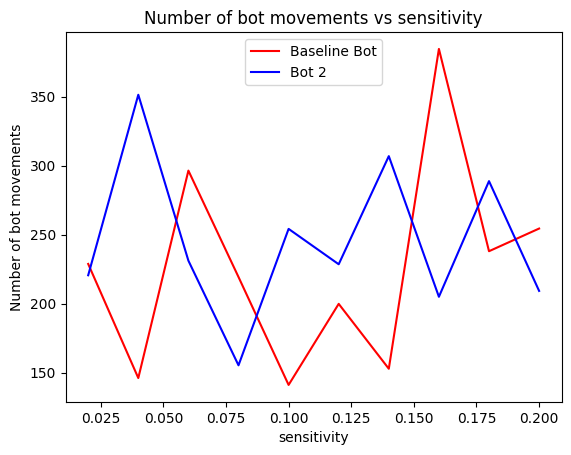

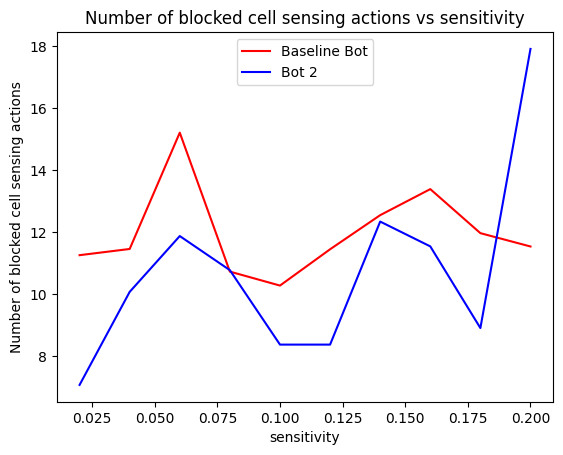

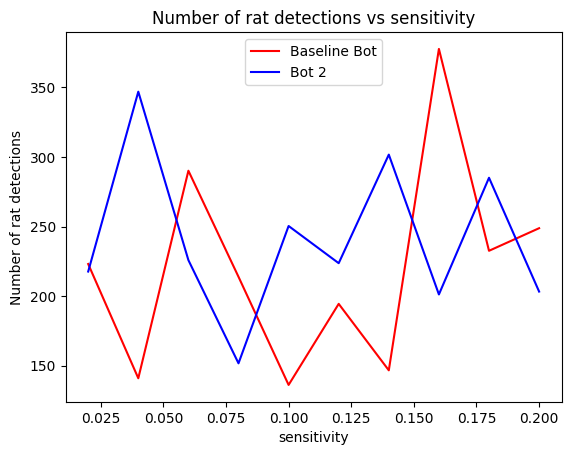

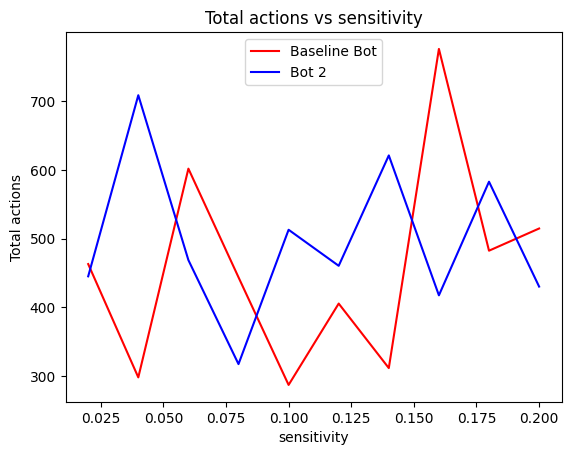

In [4]:
import matplotlib.pyplot as plt

alpha_arr = [0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2]
movements_2 = [220.5, 351.26666666666665, 231.06666666666666, 155.26666666666668, 254.1, 228.46666666666667, 306.8, 204.9, 288.7, 209.16666666666666]
senses_2 = [7.066666666666666, 10.066666666666666, 11.866666666666667, 10.766666666666667, 8.366666666666667, 8.366666666666667, 12.333333333333334, 11.533333333333333, 8.9, 17.9]
detections_2 = [217.7, 346.96666666666664, 225.9, 151.73333333333332, 250.43333333333334, 223.7, 301.73333333333335, 201.23333333333332, 285.1, 203.3]
totals_2 = [445.26666666666665, 708.3, 468.83333333333337, 317.76666666666665, 512.9, 460.5333333333333, 620.8666666666667, 417.66666666666663, 582.7, 430.3666666666667]
movements_1 = [228.7, 146.04, 296.31, 219.24, 141.05, 199.78, 152.77, 384.48, 237.92, 254.34]
senses_1 = [11.25, 11.45, 15.2, 10.72, 10.27, 11.44, 12.54, 13.38, 11.96, 11.53]
detections_1 = [223.12, 141.0, 290.15, 213.92, 136.21, 194.47, 146.7, 377.7, 232.61, 248.85]
totals_1 = [463.07, 298.49, 601.66, 443.88, 287.53000000000003, 405.69, 312.01, 775.56, 482.49, 514.72]

plt.figure()
plt.plot(alpha_arr, movements_1, color='r', label="Baseline Bot")
plt.plot(alpha_arr, movements_2, color='b', label="Bot 2")
plt.legend(loc="upper center")
plt.title('Number of bot movements vs sensitivity')
plt.ylabel('Number of bot movements')
plt.xlabel('sensitivity')
plt.show()

plt.figure()
plt.plot(alpha_arr, senses_1, color='r', label="Baseline Bot")
plt.plot(alpha_arr, senses_2, color='b', label="Bot 2")
plt.legend(loc="upper center")
plt.title('Number of blocked cell sensing actions vs sensitivity')
plt.ylabel('Number of blocked cell sensing actions')
plt.xlabel('sensitivity')
plt.show()

plt.figure()
plt.plot(alpha_arr, detections_1, color='r', label="Baseline Bot")
plt.plot(alpha_arr, detections_2, color='b', label="Bot 2")
plt.legend(loc="upper center")
plt.title('Number of rat detections vs sensitivity')
plt.ylabel('Number of rat detections')
plt.xlabel('sensitivity')
plt.show()

plt.figure()
plt.plot(alpha_arr, totals_1, color='r', label="Baseline Bot")
plt.plot(alpha_arr, totals_2, color='b', label="Bot 2")
plt.legend(loc="upper center")
plt.title('Total actions vs sensitivity')
plt.ylabel('Total actions')
plt.xlabel('sensitivity')
plt.show()

#### Improved Bot 2 moving rat

In [ ]:
#the first phase of this bot is exactly the same as the baseline bot
#the second phase is different. We keep track of the highest probability of rat to distance ratio cell.
def improved_bot2_rat_moves(ship, alpha, movements_taken, cell_sensing_actions, rat_detecting_actions):
  # movements_taken = 0
  # cell_sensing_actions = 0
  # rat_detecting_actions = 0
  direction_max_out = 0

  # PHASE 1
  movements_taken, cell_sensing_actions, rat_detecting_actions = phase_1_rat(ship, movements_taken, cell_sensing_actions, rat_detecting_actions)

  # PHASE 2:
  num_possible_movement_matrix = cardinal_openings(ship) #Gets the number of open cardinal neighbors for each cell in the ship
  #Instead of just moving once at time, the bot will move to the location with the highest probability/distance ratio and then ping again
  #the exception being if the cell it is currently in has a probability higher than a given number
  rat_location_probs = ship.open_ship
  set_initial_probs(rat_location_probs) #set the initial probabilities of closed cells to 0 and the rest to 1/total open cells
  rat_location_known = False

  while not rat_location_known:
    pinged = ping(ship, alpha, rat_location_probs) #use the sensor
    rat_detecting_actions += 1

    #SET PROBABILITIES BASED ON PING
    if pinged == -1: #Bot and rat are in same square
      rat_location_known = True

    if pinged == 1: #Bot heard ping (rat not in the current cell)
      ship.pinged.add(ship.bot_location)
      for row in range(0,d):
        for col in range(0,d): # new prob times old prob relative to dist between bot and rat
          rat_location_probs[row][col] = (math.e ** (-1 * alpha * ((abs(row-ship.bot_location[0]) + abs(col-ship.bot_location[1])) - 1))) * (rat_location_probs[row][col]) / (math.e ** (-1 * alpha * ((abs(ship.bot_location[0]-ship.rat_location[0]) + abs(ship.bot_location[1]-ship.rat_location[1])) - 1)))
          if rat_location_probs[row][col] < 0: # 1Q Rat is not where bot just was, so make the odds of the rat being there small but nonzero
            rat_location_probs[row][col] = 0.0000000000000001

    if pinged == 0: #Bot does not hear ping (rat not in the current cell)
      ship.pinged.add(ship.bot_location)
      for row in range(0,d):
        for col in range(0,d):
          rat_location_probs[row][col] = (1 - (math.e ** (-1 * alpha * ((abs(row-ship.bot_location[0]) + abs(col-ship.bot_location[1])) - 1)))) * (rat_location_probs[row][col]) / (1 - (math.e ** (-1 * alpha * ((abs(ship.bot_location[0]-ship.rat_location[0]) + abs(ship.bot_location[1]-ship.rat_location[1])) - 1))))
          if rat_location_probs[row][col] < 0: # 1Q Rat is not where bot just was, so make the odds of the rat being there small but nonzero
            rat_location_probs[row][col] = 0.0000000000000001

    move_rat(ship)
    #Rat location probabilities must be updated because rat moved after ping
    rat_KB_copy = copy.deepcopy(rat_location_probs)
    rat_KB_copy = rat_cardinal_update(ship, rat_KB_copy, rat_location_probs, num_possible_movement_matrix)
    rat_location_probs = rat_KB_copy
    #print_knowledge_base(rat_location_probs)

    highest_ratio_location = (None,None) #stores the coordinates of the highest probability/distance ratio
    max_ratio = 0

    # Make a copy of KB. Simulate rat movements one step into the future on copy of KB
    rat_KB_in_one_move = copy.deepcopy(rat_location_probs)
    rat_KB_in_one_move = rat_cardinal_update(ship, rat_KB_in_one_move, rat_location_probs, num_possible_movement_matrix)

    #get cell rat is most likely to be in
    rat_most_likely = (None,None)
    max_prob = 0
    for row in range(0,d): 
      for col in range(0,d):
        if rat_KB_in_one_move[row][col] > max_prob and (row,col) != ship.bot_location:
          max_prob = rat_KB_in_one_move[row][col]
          rat_most_likely = (row,col)

  
    for row in range(0,d): #get cell with highest prob/dist ratio
      for col in range(0,d):
        if rat_KB_in_one_move[row][col] != 0 and ship.bot_location != (row,col):
          dist = len(get_shortest_path(ship,(row,col)))
          if (row,col) in ship.pinged:
            rat_KB_in_one_move[row][col] = 0
          else:
            if rat_KB_in_one_move[row][col]/dist > max_ratio and (row,col) != ship.bot_location:
              max_ratio = rat_KB_in_one_move[row][col]
              highest_ratio_location = (row,col)

    path = get_shortest_path(ship, highest_ratio_location) #find shortest path
    original_path_length = len(path)
    if pinged == 0: #if the bot did not hear a ping, move the bot all the way to the cell more times
      distance_walked = 0
      while distance_walked<original_path_length/20*alpha:
        i = 0
        next_cell = path[i]
        bot_prev_location = ship.bot_location
        ship.ship_display[next_cell[0]][next_cell[1]] = 'B'
        ship.ship_display[bot_prev_location[0]][bot_prev_location[1]] = 'O'
        ship.bot_location = next_cell
        movements_taken += 1
        distance_walked += 1

        move_rat(ship)
        #Rat location probabilities must be updated because rat moved after bot moved
        rat_KB_copy = copy.deepcopy(rat_location_probs)
        rat_KB_copy = rat_cardinal_update(ship, rat_KB_copy, rat_location_probs, num_possible_movement_matrix)
        rat_location_probs = rat_KB_copy

        #check to see if the cell the bot is currently in has a probability higher than 1%. If so, ping again.
        if rat_location_probs[ship.bot_location[0]][ship.bot_location[1]] >=0.01:
          break
        i +=1
    elif pinged == 1: #if the bot heard a ping, move the bot one square along the path
      next_cell = path[0]
      bot_prev_location = ship.bot_location
      ship.ship_display[next_cell[0]][next_cell[1]] = 'B'
      ship.ship_display[bot_prev_location[0]][bot_prev_location[1]] = 'O'
      ship.bot_location = next_cell
      movements_taken += 1

      move_rat(ship)
      #Rat location probabilities must be updated because rat moved after bot moved
      rat_KB_copy = copy.deepcopy(rat_location_probs)
      rat_KB_copy = rat_cardinal_update(ship, rat_KB_copy, rat_location_probs, num_possible_movement_matrix)
      rat_location_probs = rat_KB_copy


  return movements_taken, cell_sensing_actions, rat_detecting_actions


#### Data for Improved Bot 2 moving rat

In [19]:
alpha_arr = [0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2]
d = 30
improved_movements_2 = []
improved_senses_2 = []
improved_detections_2 = []
improved_totals_2 = []

for alpha in alpha_arr:
  improved_total_moves = 0
  improved_movements_taken = 0
  improved_cell_sensing_actions = 0
  improved_rat_detecting_actions = 0
  for i in range(50):
    d = 30
    this_ship = ship(d)
    place_element(this_ship,'B')
    place_element(this_ship,'R')

    improved_movements_taken, improved_cell_sensing_actions, improved_rat_detecting_actions = improved_bot2_rat_moves(this_ship, alpha, improved_movements_taken, improved_cell_sensing_actions, improved_rat_detecting_actions)

  improved_movements_2.append(improved_movements_taken/50)
  improved_senses_2.append(improved_cell_sensing_actions/50)
  improved_detections_2.append(improved_rat_detecting_actions/50)
  improved_totals_2.append(improved_movements_taken/50 + improved_cell_sensing_actions/50 + improved_rat_detecting_actions/50)

print(alpha_arr)
print(improved_movements_2)
print(improved_senses_2)
print(improved_detections_2)
print(improved_totals_2)

[0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2]
[167.52, 210.78, 180.04, 186.3, 152.9, 192.04, 139.9, 165.94, 172.98, 157.56]
[11.46, 11.44, 11.14, 11.06, 11.46, 11.42, 11.96, 10.42, 10.98, 9.82]
[163.16, 206.4, 175.62, 181.14, 148.7, 187.98, 134.64, 161.16, 168.22, 153.44]
[342.14, 428.62, 366.8, 378.5, 313.06, 391.43999999999994, 286.5, 337.52, 352.17999999999995, 320.82]


#### Plotting: Bot 2 and Improved Bot 2

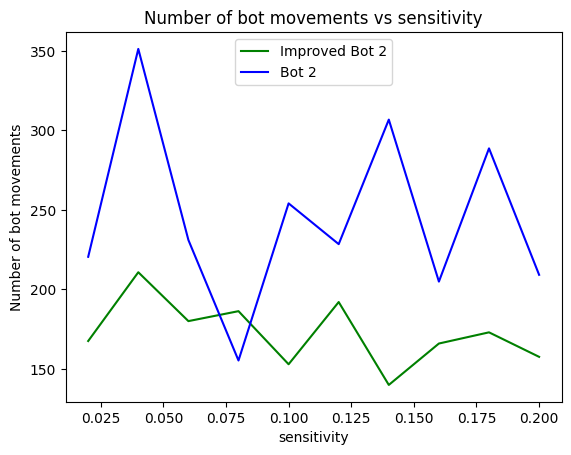

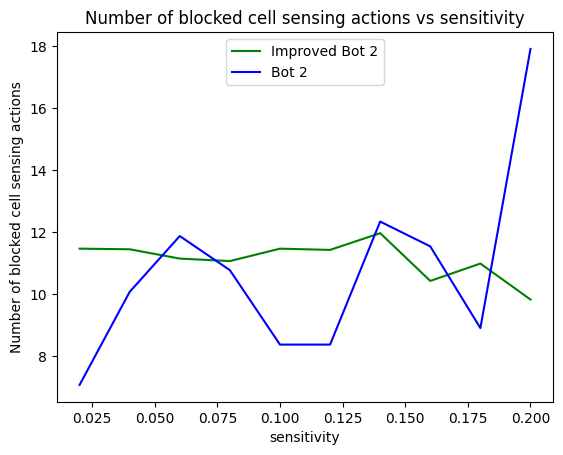

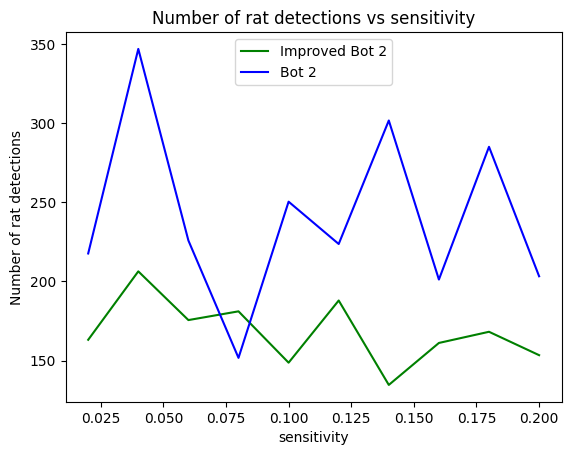

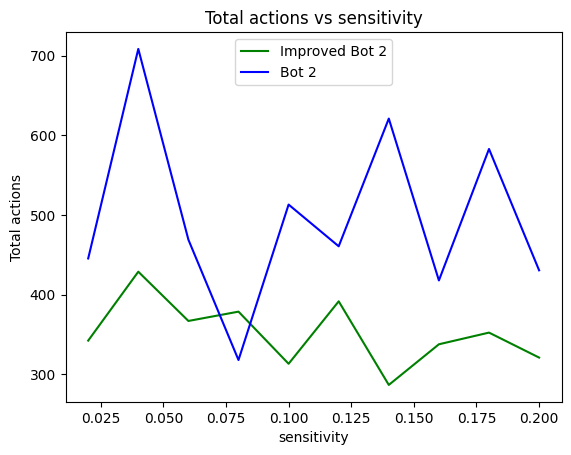

In [1]:
import matplotlib.pyplot as plt

alpha_arr = [0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2]
movements_2 = [220.5, 351.26666666666665, 231.06666666666666, 155.26666666666668, 254.1, 228.46666666666667, 306.8, 204.9, 288.7, 209.16666666666666]
senses_2 = [7.066666666666666, 10.066666666666666, 11.866666666666667, 10.766666666666667, 8.366666666666667, 8.366666666666667, 12.333333333333334, 11.533333333333333, 8.9, 17.9]
detections_2 = [217.7, 346.96666666666664, 225.9, 151.73333333333332, 250.43333333333334, 223.7, 301.73333333333335, 201.23333333333332, 285.1, 203.3]
totals_2 = [445.26666666666665, 708.3, 468.83333333333337, 317.76666666666665, 512.9, 460.5333333333333, 620.8666666666667, 417.66666666666663, 582.7, 430.3666666666667]
improved_movements_2 = [167.52, 210.78, 180.04, 186.3, 152.9, 192.04, 139.9, 165.94, 172.98, 157.56]
improved_senses_2 = [11.46, 11.44, 11.14, 11.06, 11.46, 11.42, 11.96, 10.42, 10.98, 9.82]
improved_detections_2 = [163.16, 206.4, 175.62, 181.14, 148.7, 187.98, 134.64, 161.16, 168.22, 153.44]
improved_totals_2 = [342.14, 428.62, 366.8, 378.5, 313.06, 391.43999999999994, 286.5, 337.52, 352.17999999999995, 320.82]

plt.figure()
plt.plot(alpha_arr, improved_movements_2, color='g', label="Improved Bot 2")
plt.plot(alpha_arr, movements_2, color='b', label="Bot 2")
plt.legend(loc="upper center")
plt.title('Number of bot movements vs sensitivity')
plt.ylabel('Number of bot movements')
plt.xlabel('sensitivity')
plt.show()

plt.figure()
plt.plot(alpha_arr, improved_senses_2, color='g', label="Improved Bot 2")
plt.plot(alpha_arr, senses_2, color='b', label="Bot 2")
plt.legend(loc="upper center")
plt.title('Number of blocked cell sensing actions vs sensitivity')
plt.ylabel('Number of blocked cell sensing actions')
plt.xlabel('sensitivity')
plt.show()

plt.figure()
plt.plot(alpha_arr, improved_detections_2, color='g', label="Improved Bot 2")
plt.plot(alpha_arr, detections_2, color='b', label="Bot 2")
plt.legend(loc="upper center")
plt.title('Number of rat detections vs sensitivity')
plt.ylabel('Number of rat detections')
plt.xlabel('sensitivity')
plt.show()

plt.figure()
plt.plot(alpha_arr, improved_totals_2, color='g', label="Improved Bot 2")
plt.plot(alpha_arr, totals_2, color='b', label="Bot 2")
plt.legend(loc="upper center")
plt.title('Total actions vs sensitivity')
plt.ylabel('Total actions')
plt.xlabel('sensitivity')
plt.show()